Compute the full dynamics induced by a two-body ising coulping Hamiltonian and
compare the result with the dynamics under a pure spin interaction approximation.

In [26]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import Qsim.operator.spin as spin
import Qsim.operator.phonon as phon
import Qsim.ion_chain.ising.ising_ps as iscp
import Qsim.ion_chain.ising.ising_c as iscc
import Qsim.operator.spin_phonon as sp_op
import Qsim.ion_chain.interaction.spin_phonon as Isp
from  Qsim.ion_chain.ion_system import *
from scipy import signal
import copy

In [47]:
#%%
'''set parameters of the system'''

ion_sys = ions(trap_config={'N': 2, 'fx': 3.18, 'fz': 1}, 
                   numeric_config={'active_spin': [0, 1],'active_phonon': [[0, 1]], 'pcut': [[3,3]]},
                   )
print("fx =", ion_sys.fx)
det=30 #kHz
ion_sys.list_para() #print parameters of the system
laser1 = Laser(config = {'Omega_eff':12,'wavevector':1,'Dk':2*2*np.pi / (355*10**(-9)),
                         'laser_couple':[0,1], 'mu':det+1e3*ion_sys.fx,'phase':0})
laser1.list_para()
Bz = 0 #Effective magnetic field
N = ion_sys.N

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Ions class object initialized.
fx = 3.18
________________________________________________________________
********************Setup of the Trap************************
number of ions 2
Axial COM (Confining) frequency  1  [MHz]
Radial COM (Confining) frequency  3.18 [MHz]
Axial vibrational eigenfrequency [1.   1.73] MHz
Radial (Transverse) vibrational eigenfrequency [3.18 3.02] MHz
                                                                 
********************Config of Numeric Calculation************************
index of phonon space included in simulation:  [[0, 1]]
corresonding phonon space cutoff  [[3, 3]]
********************Config of Cooling************************
Effective c

In [48]:
#%%
'''simulation for time-depedent Hamiltonian under RWA'''

#construct Hamiltonian 
Heff,arg0 = iscc.H_ord(Bz,ion_sys,laser1) #construct time-dependent H
#construct initial state (initialized as up up)
spin_config = np.array([1,1])
psi1 = sp_op.ini_state(ion_sys,spin_config,[[0,0]],1)
elist1 = [tensor(spin.sz(N,0),sp_op.p_I(ion_sys)),tensor(spin.sz(N,1),sp_op.p_I(ion_sys))]
#solve time dependent SE
times =  np.arange(0,2,10**(-4))
print('______________________________________________________________________')
print('solving for complete Hamiltonian with rwa')
result1 = sesolve(Heff,psi1,times,e_ops=elist1,args = arg0,progress_bar=True,options=Options(nsteps=1000)) 

______________________________________________________________________
solving for complete Hamiltonian with rwa
10.0%. Run time:   0.34s. Est. time left: 00:00:00:03
20.0%. Run time:   0.66s. Est. time left: 00:00:00:02
30.0%. Run time:   0.99s. Est. time left: 00:00:00:02
40.0%. Run time:   1.31s. Est. time left: 00:00:00:01
50.0%. Run time:   1.63s. Est. time left: 00:00:00:01
60.0%. Run time:   1.95s. Est. time left: 00:00:00:01
70.0%. Run time:   2.27s. Est. time left: 00:00:00:00
80.0%. Run time:   2.59s. Est. time left: 00:00:00:00
90.0%. Run time:   2.90s. Est. time left: 00:00:00:00
Total run time:   3.22s


In [55]:
'''
simulation for complete Hamiltonian after first order power series expansion without RWA
'''
#set blue and red sidebands
laser_b = copy.copy(laser1) #blue sideband
laser_b.phase = -np.pi/2 
laser_r = copy.copy(laser1) #red sideband
laser_r.mu = -laser_b.mu 
laser_r.phase = -np.pi/2
laser_b.list_para()
laser_r.list_para()
#construct Hamiltonian 
arg2 = Isp.H_td_argdic_general(ion0 = ion_sys, laser_list=[laser_r,laser_b])
Heff2 = Isp.H_td_multi_drives(ion0 = ion_sys, laser_list=[laser_r,laser_b],
                              second_order=False, rwa=False) #construct time-dependent H

                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial)
index of ions that couple to the laser field:  [0, 1]
Effective rabi frequency  12  [kHz]
Effective laser frequency  3210.0  [kHz]
Laser phase phis -90.0
(input in rad but displayed in degs)
                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial)
index of ions that couple to the laser field:  [0, 1]
Effective rabi frequency  12  [kHz]
Effective laser frequency  -3210.0  [kHz]
Laser phase phis -90.0
(input in rad but displayed in degs)


In [56]:
#%%
#construct Hamiltonian 
arg2 = Isp.H_td_argdic_general(ion0 = ion_sys, laser_list=[laser_r,laser_b])
Heff2 = Isp.H_td_multi_drives(ion0 = ion_sys, laser_list=[laser_r,laser_b],
                              second_order=False, rwa=False) 
elist1 = [tensor(spin.sz(N,0),sp_op.p_I(ion_sys)),tensor(spin.sz(N,1),sp_op.p_I(ion_sys))]
#solve time dependent SE
print('______________________________________________________________________')
print('solving for complete Hamiltonian without rwa')
result2 = sesolve(Heff2,psi1,times,e_ops=elist1,args = arg2,progress_bar=True,options=Options(nsteps=1000))  

______________________________________________________________________
solving for complete Hamiltonian without rwa
10.0%. Run time:   0.59s. Est. time left: 00:00:00:05
20.0%. Run time:   1.20s. Est. time left: 00:00:00:04
30.0%. Run time:   1.79s. Est. time left: 00:00:00:04
40.0%. Run time:   2.38s. Est. time left: 00:00:00:03
50.0%. Run time:   2.97s. Est. time left: 00:00:00:02
60.0%. Run time:   3.56s. Est. time left: 00:00:00:02
70.0%. Run time:   4.15s. Est. time left: 00:00:00:01
80.0%. Run time:   4.74s. Est. time left: 00:00:00:01
90.0%. Run time:   5.35s. Est. time left: 00:00:00:00
Total run time:   5.93s


In [51]:
#%% 
'''simulation with a pure spin approximation'''

psi0 = spin.spin_state(N,spin_config)
#print(psi0)
#print(spin_config)
J = iscp.Jt(ion_sys,laser1)
elist2 = [spin.sz(N,0),spin.sz(N,1)]
H = iscp.Hps(J,ion_sys,Bz)
print('______________________________________________________________________')
print('solving for pure spin interaction')
result = mesolve(H,psi0,times,e_ops=elist2,progress_bar=True, options=Options(nsteps=1000))

______________________________________________________________________
solving for pure spin interaction
10.0%. Run time:   0.05s. Est. time left: 00:00:00:00
20.0%. Run time:   0.11s. Est. time left: 00:00:00:00
30.0%. Run time:   0.17s. Est. time left: 00:00:00:00
40.0%. Run time:   0.23s. Est. time left: 00:00:00:00
50.0%. Run time:   0.28s. Est. time left: 00:00:00:00
60.0%. Run time:   0.34s. Est. time left: 00:00:00:00
70.0%. Run time:   0.40s. Est. time left: 00:00:00:00
80.0%. Run time:   0.46s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.58s


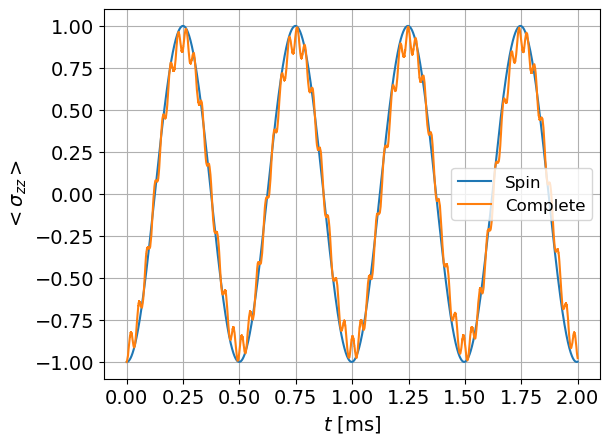

In [57]:
#%%
#plot result, compare time-dependent H under RWA and pure spin H
p0 = 0.5*(result.expect[0]+result.expect[1])
p1 = 0.5*(result1.expect[0]+result1.expect[1])
p2 = 0.5*(result2.expect[0]+result2.expect[1])
plt.plot(times,p0,label = 'Spin')
#plt.plot(times,p1,label = 'RWA')
plt.plot(times,p2,label = 'Complete')
plt.xlabel(r'$t$ [ms]',fontsize = 14)
#title = r'$\delta_{com} = $'+str(ion_sys.delta)+' kHz'
plt.ylabel(r'$<\sigma_{zz}>$',fontsize = 14)
#plt.title(title,fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

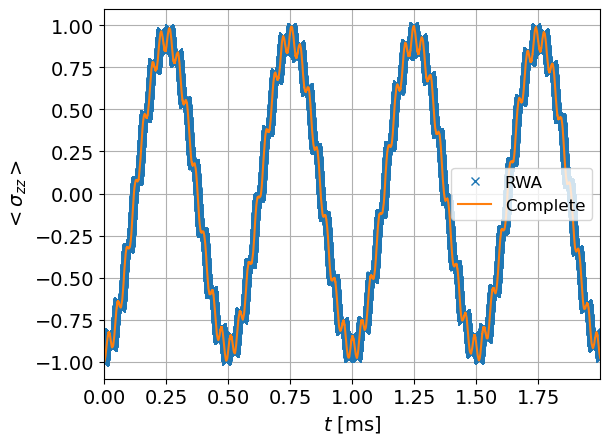

In [59]:
#%% compare results from two time-dependent Hamiltonians
plt.plot(times,p1,'x',label = 'RWA')
plt.plot(times,p2,label = 'Complete')
plt.xlim(0,max(times))
plt.xlabel(r'$t$ [ms]',fontsize = 14)
#title = r'$\delta_{com} = $'+str(ion_sys.delta)+' kHz'
plt.ylabel(r'$<\sigma_{zz}>$',fontsize = 14)
#plt.title(title,fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

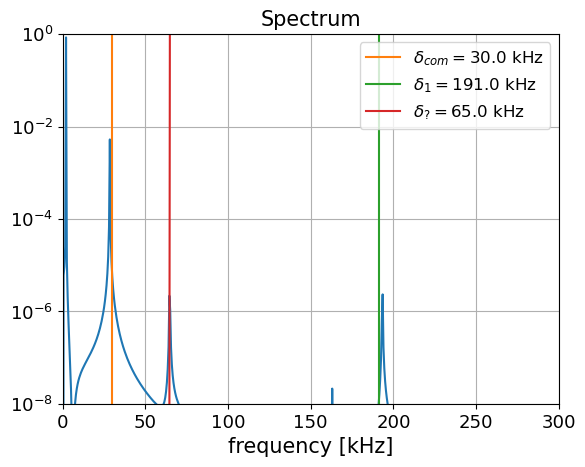

In [70]:
#%% extract frequency of oscillation for the complete evolution
dlist = laser1.detuning(ion_sys)/(2*np.pi)
f, Pxx_den = signal.periodogram(p2, 10000)
plt.semilogy(f, Pxx_den,)
label1 = r'$\delta_{com}=$' + str(np.round(dlist[0])) + ' kHz'
label2 = '$\delta_{1}=$' + str(np.round(dlist[1])) + ' kHz'
label3 = r'$\delta_{?}=$' + str(np.round(2.16*dlist[0])) + ' kHz'
plt.plot([dlist[0],dlist[0]],[0,1],label=label1)
plt.plot([dlist[1],dlist[1]],[0,1],label=label2)
plt.plot([dlist[0],2.16*dlist[0]],[0,1],label=label3)

#plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [kHz]',fontsize = 15)
#plt.ylabel(r'PSD kHz',fontsize = 15)
plt.title('Spectrum',fontsize = 15)
plt.ylim(10**(-8),1)
plt.xlim(0,300)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.legend(fontsize = 12)
plt.grid()
plt.show()